These are two practice problems from past years on BVPs.



## Flow between stationary and moving plates



The flow of an incompressible fluid between two solid plates and driven by a pressure drop is given by:

$\frac{d^2 v}{dy^2} = \frac{\Delta P}{\mu L}$

where v(y) is the velocity in the flow direction (x) as a function of position between the plates. The fluid is glycerol with a viscosity $\mu = 0.9$ Pa-s., the gap between the plates is 0.5 mm and the pressure drop $\frac{\Delta P}{L}$ is 200 MPa / m.  Calculate the velocity profile using solve\_bvp for the situation that (a) both plates are stationary and (b) for the situation that the upper plate is stationary and the bottom plate is moving at 10 m/s in the opposite direction as the pressure drop; plot these together on the same plot.



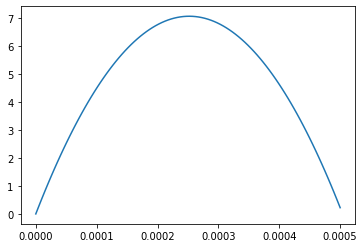

In [48]:
from scipy.integrate import solve_bvp as bvp
from scipy.integrate import solve_ivp as ivp
import numpy as np
import matplotlib.pyplot as plt

def modelfun(y, var, mu, DPL):
    v     = var[0]
    vp    = var[1]
    dvdy  = vp
    dvpdy = 1/mu*DPL
    return np.array([dvdy, dvpdy])

y0  = 0
yf  = 0.5e-3 #m
mu  = 0.9    #Pa*s
DPL = -200e6  #Pa/m
v0  = 0      #m/sec (velocity at top plate)
vf  = 10      #m/sec (velocity at bottom plate)

yeval = np.linspace(y0, yf, 100)
yspan = np.array([y0,yf])
var0  = np.array([0, 56000])
sol   = ivp(modelfun,yspan,var0, t_eval = yeval, args = (mu, DPL))
y     = sol.t
v, vp = sol.y
plt.plot(y,v)

In [101]:
y0  = 0
yf  = 0.5e-3 #m
mu  = 0.9    #Pa*s
DPL = -200e6  #Pa/m
v0  = 0      #m/sec (velocity at top plate)
vf  = 10      #m/sec (velocity at bottom plate)

yeval = np.linspace(y0, yf, 100)
yspan = np.array([y0,yf])
var0  = np.array([0, 56000])

def f1(y, var):
    v, vp = var
    dvdy  = vp
    dvpdy = np.ones(y.shape)/mu*DPL
    return [dvdy, dvpdy]

def bc(vara, varb):
    va, vpa  = vara
    vb, vpb  = varb
    return [va, vb]

p = np.polyfit([y0, yf/2, yf], [0, 5, 0], 2)
dp = np.polyder(p)
vguess = np.polyval(p, yeval)
vpguess = np.polyval(dp,yeval)
#plt.plot(yeval, vguess, 'b-')
#plt.twinx()
#plt.plot(yeval, vpguess, 'r-.')
varguess = np.array([vguess, vpguess])
print(yeval.shape)

(100,)


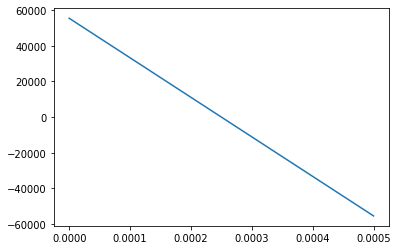

In [108]:
sol = bvp(f1, bc, yeval, varguess)
v, vp = sol.y
y     = sol.x
plt.plot(y,vp)

## exam3-5 BVP by ODE



**This is an exam. You must be present in the exam room to get credit for this problem unless you have prior permission from the instructor. You may not talk during the exam except to ask an instructor a question. By turning this in, you agree that this work is your own, and you did not get unauthorized help to complete it or provide unauthorized help to anyone else. You may not modify your exam answer after the due time without permission.**

In this problem we learn a new way to solve a *linear* boundary value problem. The problem of interest is:

$y'''(x) - x^2 y = -x^4$ with $y(0)=0, y'(0)=0, y(2)=4$.

This will take some steps, so read the following carefully. Some of these steps will be worked out, and others you will be asked to complete. You *do not need to derive these*, they are here to guide what you will do.

First, we recall that the general solution of a linear ODE can be written as a linear combination of solutions to the homogeneous equation (where the right hand side is zero) and a particular solution to the non-homogeneous equation (where the right hand side in this case is $-x^4$).

Here are the homogeneous versions and the particular version of the equation above, expressed in *initial value form*. The initial conditions are chosen here to provide three linearly independent functions $Y_1, Y_2$, and $Y_3$. For $Y_p$ any values can be used since any particular solution will do.

$Y_1''' - x^2 Y_1 = 0$ with $Y_1(0)=1, Y_1'(0)=0, Y_1''(0)=0$

$Y_2''' - x^2 Y_2 = 0$ with $Y_2(0)=0, Y_2'(0)=1, Y_2''(0)=0$

$Y_3''' - x^2 Y_3 = 0$ with $Y_3(0)=0, Y_3'(0)=0, Y_3''(0)=1$

$Y_p''' - x^2 Y_p = -x^4$ with $Y_p(0)=0, Y_p'(0)=0, Y_p''(0)=0$

These can be combined to form the general solution to the differential equation.

$y(x) = C_1 Y_1(x) + C_2 Y_2(x) + C_3 Y_3(x) + Y_p(x)$

To get towards a solution to the original BVP, we next apply the boundary conditions to find the constants $C_i$.

$y(0) = 0 = C_1 + 0 + 0 + 0$

$y'(0) = 0 = 0 + C_2 + 0 + 0$

$y(2) = 4 = C_1 Y_1(2) + C_2 Y_2(2) + C_3 Y_3(2) + Y_p(2)$

Combined, these lead to:

$y(x) = \frac{4 - Y_p(2)}{Y_3(2)} Y_3(x) + Y_p(x)$ where $Y_p(2)$ means the function $Y_p$ evaluated at $x=2$ and $Y_3(2)$ means the function $Y_3$ evaluated at $x=2$.

That is remarkably the solution to the boundary value problem originally stated, and we can now get $Y_3$ and $Y_p$ by integrating two *ordinary initial value* differential equations!



### Solve for $Y_3$ and $Y_p$



Find solutions to these two initial value ODEs over the range of $x=0$ to $x=2$:

$Y_3''' - x^2 Y_3 = 0$ with $Y_3(0)=0, Y_3'(0)=0, Y_3''(0)=1$

Note that in the next step you will need to evaluate $Y_3(2)$ and $Y_p(2)$.



In [133]:
def y3(x, var):
    Y3   = var[0]
    Y3p  = var[1]
    Y3pp = var[2]
    
    dY3dx   = Y3p
    dY3pdx  = Y3pp
    dY3ppdx = x**2*Y3
    
    return np.array([dY3dx, dY3pdx, dY3ppdx])
xspan = np.array([0,2])
xeval = np.linspace(0,2,100)
var0  = np.array([0,0,1])
sol = ivp(y3,xspan, var0, dense_output = True)
x             = sol.t
y3, y3p, y3pp = sol.y
Y32 = y3[-1]
Y3  = sol.sol

In [145]:
def yp(x, var):
    YP   = var[0]
    YPp  = var[1]
    YPpp = var[2]
    
    dYPdx   = YPp
    dYPpdx  = YPpp
    dYPppdx = x**2*YP - x**4
    
    return np.array([dYPdx, dYPpdx, dYPppdx])
xspan = np.array([0,2])
xeval = np.linspace(0,2,100)
var0  = np.array([0,0,0])
sol = ivp(yp,xspan, var0, dense_output = True)
x             = sol.t
yP, yPp, yPpp = sol.y
YP2 = yP[-1]
YP  = sol.sol

$Y_p''' - x^2 Y_p = -x^4$ with $Y_p(0)=0, Y_p'(0)=0, Y_p''(0)=0$



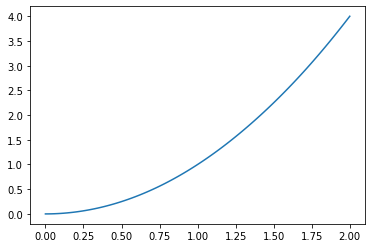

In [149]:
def y(x):
    result = (4 - YP2)/Y32*Y3(x) + YP(x)
    return result[0]

x = np.linspace(0,2,100)
y = [y(val) for val in x]

plt.plot(x,y)

### Combine them to get a solution to the BVP



Use your solutions to create the overall solution. $Y_p(2)$ means evaluate $Y_p(x)$ at $x=2$. $Y_3(2)$ means evaluate $Y_3(x)$ at $x=2$. You can do this anyway you want.

$y(x) = \frac{4 - Y_p(2)}{Y_3(2)} Y_3(x) + Y_p(x)$

Make a plot of $y(x)$.

